<a href="https://colab.research.google.com/github/yoyadima/DA/blob/main/Basics_of_static_practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Напишите функцию NA_position, которая получает на вход два числовых вектора одинаковой длины. Функция должна возвращать TRUE, если позиции NA в обоих векторах совпадают или пропущенных значений вообще нет, и значение FALSE, если позиции NA в векторах не совпадают.

In [ ]:
def ifna(vector_1, vector_2):
  for i in range(0, len(vector_1)):
    if (vector_1[i] == 'NaN' or vector_2[i] == 'NaN') and  vector_2[i] != vector_1[i]:
      return False
      break
  return True


a = ['NaN', 2, 4, 8]
b = ['NaN', 2, 4, 0]
ifna(a, b)

True

###Напишите функцию smart_test, которая получает на вход dataframe с двумя номинативными переменными с произвольным числом градаций. Функция должна проверять гипотезу о независимости этих двух переменных при помощи критерия хи - квадрат или точного критерия Фишера.

Если хотя бы в одной ячейке таблицы сопряженности двух переменных меньше 5 наблюдений, функция должна рассчитывать точный критерий Фишера и возвращать вектор из одного элемента: получившегося p - уровня значимости.

Если наблюдений достаточно для расчета хи-квадрат (во всех ячейках больше либо равно 5 наблюдений), тогда функция должна применять критерий хи-квадрат и возвращать вектор из трех элементов: значение хи-квадрат, число степеней свободы,  p-уровня значимости.

In [ ]:
import scipy.stats as stats
import numpy as np


def fish_test(data):
  oddsratio, pvalue = stats.fisher_exact(data)
  output = "test Statistics: {}\p-value: {}\n"
  res = output.format(oddsratio, pvalue)
  return res


def smart_test(data):
  for i in range(0, len(data)):
    for j in range(0, len(data[0])):
      if data[i][j] < 5:
        fish_test(data)
        break
  chi2, prob, df, expected = stats.chi2_contingency(data)
  output = "test Statistics: {}\n degrees of freedom: {}\n np-value: {}\n"
  res = output.format(chi2, df, prob)
  print(expected[:, 0])
  return res


In [ ]:
table = [[12, 7], [6, 7]]
smart_test(table)

[10.6875  7.3125]


'test Statistics: 0.34753550543024225\n degrees of freedom: 1\n np-value: 0.5555115470131495\n'

###Почувствуй себя биоинформатиком!  Вся наследственная информация в живых организмах хранится внутри молекулы ДНК. Эта молекула состоит из последовательности четырех "букв" — ﻿A, T, G и C. 

Напишите функцию most_significant, которая получает на вход dataframe с произвольным количеством переменных, где каждая переменная это нуклеотидная последовательность. 
Для каждой переменной мы можем проверить нулевую гипотезу о том, что все нуклеотиды (A, T, G, C) встречаются равновероятно внутри этой последовательности. Однако, возможно, что в некоторых последовательностях распределение частоты встречаемости каждого нуклеотида отличается от равномерного.

Функция должна возвращать вектор с ﻿названием переменной (или переменных), в которой был получен минимальный p - уровень значимости при проверке гипотезы о равномерном распределении нуклеотидов при помощи критерия хи - квадрат. 

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np


data_atgc = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data.csv")

def most_significant(test_ar):
  test_ar=np.array(data_atgc).T
  p_value_arr = []
  for i in test_ar:
    i = list(i)
    A, T, G, C = i.count('A'), i.count('T'), i.count('G'), i.count('C')
    matrix_chi = np.zeros(shape=(2, 4))
    matrix_chi[0,0], matrix_chi[0,1], matrix_chi[0,2], matrix_chi[0,3] = A, T, G, C
    nd_distr = len(i) / 12
    matrix_chi[1,0], matrix_chi[1,1], matrix_chi[1,2], matrix_chi[1,3] = nd_distr, nd_distr, nd_distr, nd_distr
    chi2, prob, df, expected = stats.chi2_contingency(matrix_chi)
    p_value_arr.append(float(prob))
  return list(data_atgc)[p_value_arr.index(min(p_value_arr))]

In [ ]:
list(data_atgc)[0]
most_significant(data_atgc)

'V3'

###Создайте новую переменную important_cases - фактор с двумя градациями ("No" и "Yes"). Переменная должна принимать значение Yes, если для данного цветка значения хотя бы трех количественных переменных выше среднего. В противном случае переменная important_cases  будет принимать значение No.

In [ ]:
import pandas as pd
import numpy as np

def iris(df):
  df = np.array(df)
  for j in range(0, len(df[:,0])):
    flag_mean = 0
    for k in range(0, len(df)):
      if df[j, k] > df[:,k].mean():
        flag_mean += 1
    if flag_mean >= 3:
      df['important_cases'] = 'Yes'
    else:
      df['important_cases'] = 'No'
  return df


In [ ]:
def test(df):
  df2 = df.T.mean(numeric_only=True, axis=1)
  df['important_cases'] = 'Yes'
  m = len(df.iloc[:, 0])
  for i in range(0, m - 1):
    flag_mean = 0
    for j in range(0, len(df) - 1):
      if int(df.iloc[i, j]) > int(df2[j]):
        flag_mean += 1
    if flag_mean >= 2:
      df.at[i,'important_cases'] = 'Yes'
    else:
      df.at[i,'important_cases'] = 'No'
  return df

In [ ]:
import pandas as pd
import numpy as np
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 9, 3]]),
                   columns=['a', 'b', 'c'])
#df = np.array(df2)
#print(df[:,0].mean())

print(test(df2))

   a  b  c important_cases
0  1  2  3              No
1  4  5  6             Yes
2  7  8  9             Yes
3  1  9  3             Yes


In [ ]:
def test1(df):
  df2 = df.T.mean(numeric_only=True, axis=1)
  df['important_cases'] = 1
  m = len(df.iloc[:, 0])
  for i in range(0, m - 1):
    flag_mean = 0
    for j in range(0, len(df) - 1):
      if int(df.iloc[i, j]) > int(df2[j]):
        flag_mean += 1
    if flag_mean >= len(df) - 1:
      df.at[i,'important_cases'] = 1
    else:
      df.at[i,'important_cases'] = 0
  return df

In [ ]:
import pandas as pd
import numpy as np
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 9, 3]]),
                   columns=['a', 'b', 'c'])

print(test1(df2))

   a  b  c  important_cases
0  1  2  3                0
1  4  5  6                0
2  7  8  9                1
3  1  9  3                1


###Напишите функцию stat_mode, которая получает на вход вектор из чисел произвольной длины и возвращает числовой вектор с наиболее часто встречаемым значением. Если наиболее часто встречаемых значений несколько, функция должна возвращать несколько значений моды  в виде числового вектора. 

In [ ]:
def func_mode(df):
  res_mas = []
  max_count = 0
  for i in range(0, len(df)):
    if df.count(df[i]) >= max_count:
      max_count = df.count(df[i])
  for i in range(0, len(df)):
    if df.count(df[i]) == max_count and df[i] not in res_mas:
      res_mas.append(df[i])
  return res_mas
     

In [ ]:
func_mode([1, 1, 1, 2, 2, 2, 3, 3, 3])

[1, 2, 3]

###Доктор Пилюлькин решил вооружиться статистикой, чтобы сравнить эффективность трех лекарств! Давайте поможем ему и напишем функцию max_resid, которая получает на вход dataframe с двумя переменными: типом лекарства и результатом его применения. 

Drugs - фактор с тремя градациями: drug_1, drug_2, drug_3.     

Result - фактор с двумя градациями: positive, negative.

Функция должна находить ячейку таблицы сопряженности с максимальным  значением стандартизированного остатка и возвращать вектор из двух элементов: название строчки и столбца этой ячейки.

Для расчета стандартизированных остатков вы можете воспользоваться уже знакомой вам функцией chisq.test(). Изучите справку по этой функции, чтобы найти, где хранятся стандартизированные остатки.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def max_resid(data):
  chi2, prob, df, expected = stats.chi2_contingency(data)
  max_expected = 0
  max_ex_x = 0
  max_ex_y = 0
  for i in range(0, len(expected[:, 0]) - 1):
    for j in range(0, len(expected) - 1):
      if expected[i, j] >= max_expected:
        max_expected = expected[j, i]
        max_ex_x = i
        max_ex_y = j
  return [data.columns[j], i]

In [ ]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 9, 3]]),
                   columns=['a', 'b', 'c'])


max_resid(df2)

['c', 2]

###Начнем с простого и вспомним, как применять логистическую регрессию в R. Напишите функцию get_coefficients, которая получает на вход dataframe с двумя переменными x ( фактор с произвольным числом градаций) и y ( фактор с двумя градациями ﻿). Функция строит логистическую модель, где y — зависимая переменная, а x — независимая, и возвращает вектор со значением экспоненты коэффициентов модели.



In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sf
import numpy as np


df = pd.read_csv("https://stepik.org/media/attachments/course/524/test_data_01.csv", index_col=False)

df.y[df.y == 1] = 0
df.y[df.y == 2] = 1
# x - таблица с исходными данными факторов (x1, x2, x3)
x = np.array(df.iloc[:,0])
# y - таблица с исходными данными зависимой переменной
y = np.array(df.iloc[:,-1])


#log_reg = sm.Logit(y, x).fit() 
#print(log_reg.summary()) 
res = sf.glm('y ~ C(x)', df, family=sm.families.Binomial()).fit()
print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       47
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.570
Date:                Sun, 07 Feb 2021   Deviance:                       65.139
Time:                        17:51:22   Pearson chi2:                     50.0
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1054      0.459     -0.229      0.8

In [ ]:
from sklearn.linear_model import LogisticRegression

def get_coeff(df):
  # Considering last column is the target column
  X = df.drop(columns=df.columns[-1])
  y = df[df.columns[-1]]
  model = LogisticRegression()
  model.fit(X, y)
  coef = np.r_[model.intercept_, model.coef_.flatten()]
  return coef

get_coeff(df)

array([0.20081457, 0.02267641])

###Если в нашей модели есть количественные предикторы, то в интерцепте мы будем иметь значение, соответствующее базовому уровню категориальных предикторов и нулевому уровню количественных. Это не всегда осмысленно. Например, нам не интересен прогноз для людей нулевого возраста или роста. В таких ситуациях количественную переменную имеет смысл предварительно центрировать так, чтобы ноль являлся средним значением переменной. Самый простой способ центрировать переменную — отнять от каждого наблюдения среднее значение всех наблюдений.

*xcentered_{i}= x_{i} - \bar{x}*
  

В этом задании вашей задачей будет  написать функцию centered, которая получает на вход датафрейм и имена переменных, которые необходимо центрировать так, как это описано выше. Функция должна возвращать этот же датафрейм, только с центрированными указанными переменными.

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

df = pd.read_csv("https://stepic.org/media/attachments/course/524/cen_data.csv")

print(df)
def mean_norm(data, col_names):
  for i in col_names:
    x = data[i].values.reshape(-1, 1) #returns a numpy array
    #min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = preprocessing.MinMaxScaler().fit_transform(x)
    data[i] = pd.DataFrame(x_scaled)
  return data

print(mean_norm(df, ['X1','X3']))

     X1    X2    X3    X4
0   8.5   9.7  10.7  10.3
1   8.1  12.8   9.7  12.6
2   9.6   7.4   8.4  12.7
3   9.6  10.9   7.7   8.0
4  11.9  13.7  12.3  11.0
         X1    X2        X3    X4
0  0.105263   9.7  0.652174  10.3
1  0.000000  12.8  0.434783  12.6
2  0.394737   7.4  0.152174  12.7
3  0.394737  10.9  0.000000   8.0
4  1.000000  13.7  1.000000  11.0


###Представьте, что мы работаем в аэропорту в службе безопасности и сканируем багаж пассажиров. В нашем распоряжении есть информация о результатах проверки багажа за предыдущие месяцы. Про каждую вещь мы знаем:

являлся ли багаж запрещенным - is_prohibited (No - разрешенный, Yes - запрещенный) 
его массу (кг) - weight
длину (см) - length
ширину (см) - width
тип багажа (сумка или чемодан) - type.

Напишите функцию get_features , которая получает на вход набор данных о багаже. Строит логистическую регрессию, где зависимая переменная ﻿ - ﻿являлся ли багаж запрещенным, а предикторы - остальные переменные,﻿ и возвращает вектор с названиями статистически значимых переменных (p < 0.05) (в модели без взаимодействия). Если в данных нет значимых предикторов, функция возвращает строку с сообщением  "Prediction makes no sense".

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as sf
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv("https://stepic.org/media/attachments/course/524/test_luggage_1.csv")

def get_features(df):

  df.is_prohibited[df.is_prohibited == 'No'] = 0
  df.is_prohibited[df.is_prohibited == 'Yes'] = 1
  res = sf.glm('is_prohibited ~ weight + length + width + type', df, family=sm.families.Binomial()).fit().summary()
  print(res)
  coef_names = np.array([str(res.tables[1][i][0]) for i in range(1, 6)])
  p_values = np.array([float(str(res.tables[1][i][4])) for i in range(1, 6)])
  res1 = coef_names[p_values < 0.05]
  result = [re.findall(name, r) for r in res1 for name in ['weight', 'length', 'width', 'type']]
  result = list(np.array([r for r in result if r]).ravel())
    
  return result if len(result) else 'Prediction makes no sense'

get_features(df)

                            Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_prohibited[0]', 'is_prohibited[1]']   No. Observations:                   60
Model:                                                  GLM   Df Residuals:                       55
Model Family:                                      Binomial   Df Model:                            4
Link Function:                                        logit   Scale:                          1.0000
Method:                                                IRLS   Log-Likelihood:                -41.393
Date:                                      Sun, 07 Feb 2021   Deviance:                       82.785
Time:                                              17:51:23   Pearson chi2:                     60.0
No. Iterations:                                           4                                         
Covariance Type:                                  nonrobust                                

'Prediction makes no sense'

###Интересной особенностью логистической регрессии является тот факт, что ее предсказания — это не конкретный класс, к которому мы отнесем новое наблюдение, а вероятность отнесения к каждому из классов! Если вас интересует, как принимать решение о классификации новых объектов в логистической регрессии, посмотрите наш урок по этой теме в курсе по R, где мы разбираем этот вопрос.

В результате, построив регрессионную модель, мы можем сделать вероятностное предсказание для каждого нового наблюдения. Иногда при решении практических задач бывает важным обратить внимание на те объекты, которые получили максимальное значение вероятности принадлежности к одному из классов.

Продолжим нашу работу в службе безопасности! Разобравшись с тем, какие предикторы могут помогать нам предсказывать запрещенный багаж, давайте применим наши знания для повышения безопасности в аэропорту. Обучим наш алгоритм различать запрещенный и разрешенный багаж на уже имеющихся данных и применим его для сканирования нового багажа!

Напишите функцию, которая принимает на вход два набора данных. Первый dataframe, как и в предыдущей задаче, содержит информацию об уже осмотренном багаже (запрещенный или нет, вес, длина, ширина, тип сумки). 

Второй набор данных — это информация о новом багаже, который сканируется прямо сейчас. В данных также есть информация:  вес, длина, ширина, тип сумки и имя пассажира (смотри описание переменных в примере). 

Используя первый набор данных, обучите регрессионную модель различать запрещенный и разрешенный багаж. При помощи полученной модели для каждого наблюдения в новых данных предскажите вероятность того, что багаж является запрещенным. Пассажиров, чей багаж получил максимальное значение вероятности, мы попросим пройти дополнительную проверку. 

Итого, ваша функция принимает два набора данных и возвращает имя пассажира с наиболее подозрительным багажом. Если несколько пассажиров получили максимальное значение вероятности, то верните вектор с несколькими именами. 

В этой задаче для предсказания будем использовать все предикторы, даже если некоторые из них оказались незначимыми. Для предсказания стройте модель без взаимодействия предикторов.

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

df_test = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data_passangers.csv")
df_predict = pd.read_csv("https://stepic.org/media/attachments/course/524/predict_passangers.csv")


df_test.is_prohibited[df_test.is_prohibited == 'No'] = 0
df_test.is_prohibited[df_test.is_prohibited == 'Yes'] = 1

df_test.type[df_test.type == 'Suitcase'] = 0
df_test.type[df_test.type == 'Bag'] = 1

df_predict.type[df_predict.type == 'Suitcase'] = 0
df_predict.type[df_predict.type == 'Bag'] = 1
def predict_most_dangerous_passangers(df_test, df_predict):
  X_predict = df_predict.drop(columns=df_predict.columns[-1])
  X = df_test.drop(columns=df_test.columns[0])
  y = df_test.drop(columns=df_test.columns[1:5])
  y=np.array(y.astype('int').values.ravel())
  X=np.array(X.astype('int'))
  clf = LogisticRegression(random_state=0).fit(X, y)

  #print('Predicts_vector = ', clf.predict(X_predict))

  passangers_probability = clf.predict_proba(X_predict)
  #print('Probability_predicts_vector = ', passangers_probability)

  #print('Score = ',clf.score(X, y))

  df_predict['passangers_probability'] = passangers_probability[:,1]
  most_dangerous = df_predict.loc[df_predict['passangers_probability']==df_predict['passangers_probability'].max()].index[0]
  return 'MOST DANGEROUS IS ' + df_predict.loc[most_dangerous, 'passangers']

predict_most_dangerous_passangers(df_test, df_predict)

'MOST DANGEROUS IS Polina'

###Напишите функцию normality_test, которая получает на вход dataframe с произвольным количеством переменных разных типов (количественные, строки, факторы) и проверяет нормальность распределения количественных переменных. Функция должна возвращать вектор значений p-уровней значимости теста shapiro.test для каждой количественной переменной.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

data = pd.read_csv('https://stepic.org/media/attachments/course/524/test.csv')

def normality_test(data):
  result_SHW_test_vector = []
  for i in data.columns:
    if data[i].dtypes == 'float64' or data[i].dtypes == 'int64':
      shapiro_test = stats.shapiro(np.array(data[i]))
      result_SHW_test_vector.append(shapiro_test[1])
  result_SHW_test_vector = np.array(result_SHW_test_vector)
  return result_SHW_test_vector

normality_test(data)

array([0.56821054, 0.24583367, 0.31419012, 0.00937374])

###Напишите функцию smart_anova, которая получает на вход dataframe с двумя переменными x и y. Переменная x — это количественная переменная, переменная y - фактор, ﻿разбивает наблюдения на три группы.

Если распределения во всех группах значимо не отличаются от нормального, а дисперсии в группах гомогенны, функция должна сравнить три группы при помощи дисперсионного анализа и вернуть ﻿именованный вектор со значением p-value, имя элемента — "ANOVA".

Если хотя ﻿бы в одной группе распределение значимо отличается от нормального или дисперсии негомогенны, функция сравнивает группы при помощи критерия Краскела — Уоллиса и возвращает именованный вектор со значением p-value, имя вектора  — "KW".

Распределение будем считать значимо отклонившимся от нормального, если в тесте shapiro.test() p < 0.05.

Дисперсии будем считать не гомогенными, если в тесте bartlett.test() p < 0.05.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import f_oneway

data = pd.read_csv("https://stepic.org/media/attachments/course/524/s_anova_test.csv")

data["count"] = data.groupby('y').cumcount()
data_pivot = data.pivot_table(values='x', index=data['count'] ,columns='y', aggfunc='first')
df = np.array(data_pivot)

def smart_anova(data):
  shapiro_test_pvalue_array = np.apply_along_axis(shapiro, 0, data)[1]
  bartlett_test_pvalue = bartlett(*data.T)[1]

  if (shapiro_test_pvalue_array < 0.05).any() or bartlett_test_pvalue < 0.05:
    KW = kruskal((*data.T))[1]
    return "KW" + KW
  else:
    ANOVA = np.array(f_oneway(*data.T)[1])
    print(data)
    print(*data.T)
    return ANOVA

smart_anova(df)


[[ 1.08 -1.17 -1.6 ]
 [ 0.07 -3.4  -1.08]
 [-1.02 -1.46  0.59]
 [-0.45 -0.65  0.36]
 [ 0.81  0.52  1.72]
 [-1.27 -1.91  0.8 ]
 [-0.75 -0.08 -0.09]
 [ 1.47 -0.5  -0.78]
 [-0.2   0.17  0.26]
 [-1.48  0.9   0.15]]
[ 1.08  0.07 -1.02 -0.45  0.81 -1.27 -0.75  1.47 -0.2  -1.48] [-1.17 -3.4  -1.46 -0.65  0.52 -1.91 -0.08 -0.5   0.17  0.9 ] [-1.6  -1.08  0.59  0.36  1.72  0.8  -0.09 -0.78  0.26  0.15]


array(0.26529804)

###Напишите функцию normality_by, которая принимает на вход dataframe c тремя переменными. Первая переменная количественная, вторая и третья имеют две градации и разбивают наши наблюдения на группы. Функция должна проверять распределение на нормальность в каждой получившейся группе и возвращать dataframe с результатами применения теста ﻿ shapiro.test

In [ ]:


df = pd.read_csv('https://stepic.org/media/attachments/course/524/test_for_norm.csv')
def norm_test(df):

  df["yz"] = df["y"].astype("str") + df["z"].astype("str") 
  df["count"] = df.groupby("yz").cumcount()
  data_pivot = df.pivot(columns="yz", values="x", index="count")
  data_np = np.array(data_pivot)
  result = {}

  for column, group in zip(data_np.T, data_pivot.columns):
    result[group] = shapiro(column[~np.isnan(column)])[1]
    
  return pd.Series(result)

norm_test(df)

02    0.219766
03    0.623818
12    0.196036
13    0.047823
dtype: float64

###При помощи библиотеки ggplot2 визуализируйте распределение переменной Sepal.Length в трех группах в данных Iris. Сохраните график в переменную obj, но не выводите график на печать.

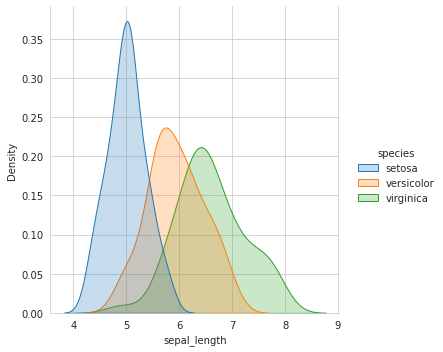

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
      
#sns.set_theme();
#sns.set_context("talk");
sns.set_style("whitegrid");
sns.displot(data, x="sepal_length", hue="species", kind="kde", fill=True);

83.0 146.0


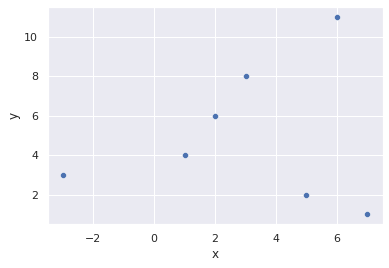

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

x = np.array([-3.0,1.0,2.0,3.0,5.0,6.0,7.0])
y = np.array([3.0,4.0,6.0,8.0,2.0,11.0,1.0])

df = pd.DataFrame(data=np.vstack((x, y)).T, columns=['x', 'y'])
x_centr = sum(df['x']) / df['x'].count()
y_centr = sum(df['y']) / df['y'].count()
df1 = pd.DataFrame()
df1['wcsom'] = (df['x'] - x_centr) ** 2 + (df['y'] - y_centr) ** 2
sns.set_theme()
#sns.set_context("notebook")
sns.scatterplot(data=df, x="x", y="y");
sm = df1['wcsom'].sum()
  
 
kmeans = KMeans(2)
kmeans.fit(df)
print(kmeans.inertia_, sm)



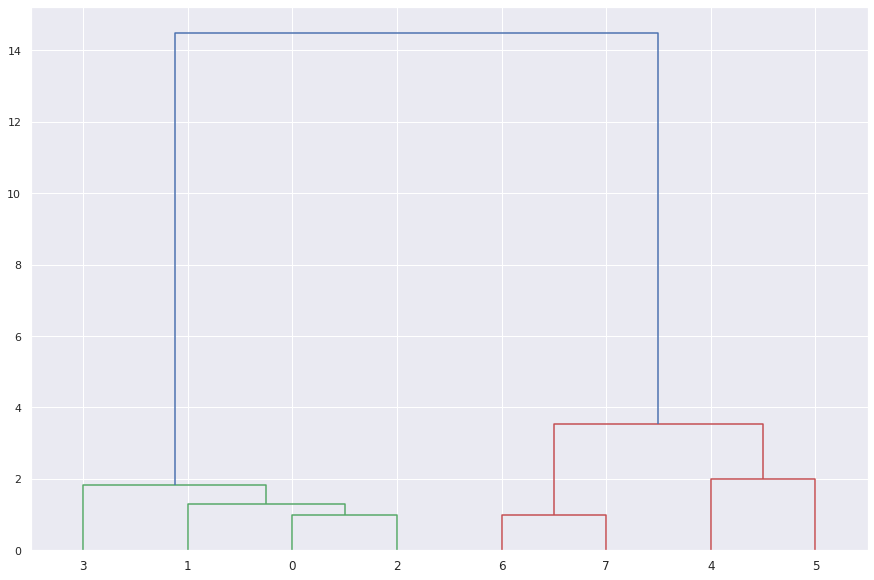

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib as plt
import numpy as np

# Для прорисовки графики
%matplotlib inline

# Наши данные
points = np.array([[1,2], [2,1], [2,2], [1,3], [6,7], [6,5], [7,8], [8,8]], dtype=float)

Z = linkage(points, 'ward')
fig = plt.pyplot.figure(figsize=(15, 10))
dn = dendrogram(Z)
#plt.pyplot.scatter(points[:, 0], points[:, 1])
plt.pyplot.show()

###Напишите функцию smart_hclust, которая получает на вход dataframe  с произвольным числом количественных переменных и число кластеров, которое необходимо выделить при помощи иерархической кластеризации.

Функция должна в исходный набор данных добавлять новую переменную фактор - cluster  -- номер кластера, к которому отнесено каждое из наблюдений.

,X1,X2,X3,X4,X5,cluster
0,11,7,10,10,8,1
1,9,10,10,8,6,1
2,9,2,12,14,11,2
3,9,11,8,10,3,1
4,7,9,10,11,14,2
5,9,11,9,6,9,1
6,16,20,22,19,16,4
7,23,18,21,24,16,4
8,15,21,14,21,21,3
9,19,20,15,17,17,3


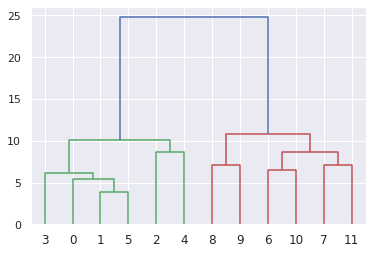

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import  linkage, fcluster, dendrogram
import seaborn as sns


data = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data_hclust.csv")
def smart_hclust(data):
  Z = linkage(data, method="average", metric='euclidean')
  dend = dendrogram(Z)
  label = fcluster(Z, 9.5, criterion='distance')
  data['cluster'] = label
  return data

smart_hclust(data)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

data = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data_hclust.csv")

def smart_hclust(data):
  clustering = AgglomerativeClustering(distance_threshold=None, 
                                     n_clusters=4).fit(data)
  data['cluster'] = clustering.labels_
  return data



smart_hclust(data)


,X1,X2,X3,X4,X5,cluster
0,11,7,10,10,8,3
1,9,10,10,8,6,3
2,9,2,12,14,11,1
3,9,11,8,10,3,3
4,7,9,10,11,14,1
5,9,11,9,6,9,3
6,16,20,22,19,16,0
7,23,18,21,24,16,0
8,15,21,14,21,21,2
9,19,20,15,17,17,2


###Интересной особенностью кластерного анализа является тот факт, что мы получаем только итоговый ответ, к какому кластеру принадлежит каждое наблюдение. Однако мы не знаем, по каким переменным различаются выделенные кластеры. Поэтому, если нас интересует не только сам факт того, что мы смогли выделить кластеры в наших данных, но мы также хотим понять, чем же они различаются, разумно сравнить кластеры между собой по имеющимся переменным.

Напишите функцию get_difference, которая получает на вход два аргумента: 

  1. test_data — набор данных с произвольным числом количественных переменных.
  2. n_cluster — число кластеров, которое нужно выделить в данных при помощи иерархической кластеризации.

Функция должна вернуть названия переменных, по которым были обнаружен значимые различия между выделенными кластерами (p < 0.05)﻿. Иными словами, после того, как мы выделили заданное число кластеров, мы добавляем в исходные данные новую группирующую переменную — номер кластера, и сравниваем получившиеся группы между собой по количественным переменным при помощи дисперсионного анализа.

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import  linkage, fcluster, dendrogram
from scipy.stats import f_oneway
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("https://stepic.org/media/attachments/course/524/cluster_1.csv")

def get_difference(data, n):
  Z = linkage(data, method="average", metric='euclidean')
  #dend = dendrogram(Z)
  label = fcluster(Z, t=n, criterion='maxclust')
  data['cluster'] = label
  df2 = data.loc[data['cluster'] == 1].drop(['cluster'], axis=1).reset_index(drop=True)
  df3 = data.loc[data['cluster'] == 2].drop(['cluster'], axis=1).reset_index(drop=True)
  p = f_oneway(np.array(df3), np.array(df2))[1]
  res = []
  for i in range(0, len(p)):
    if p[i] < 0.05:
      res.append(df2.columns[i])
  return res
print(get_difference(data, 2))


['V2']


###Напишите функцию get_pc﻿, которая получает на вход dataframe с произвольным числом количественных переменных. Функция должна выполнять анализ главных компонент и добавлять в исходные данные две новые колонки со значениями первой и второй главной компоненты. Новые переменные должны называться "PC1"  и "PC2" соответственно.

[0.60794382 0.2541055 ]


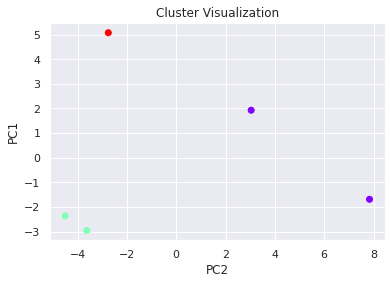

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'


data = pd.read_csv("https://stepic.org/media/attachments/course/524/pca_test.csv")
sns.set_theme()

def get_pc(data):
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(data)
  principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
  data = pd.concat([data, principalDf], axis = 1, copy=False)
  cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
  cluster.fit_predict(principalDf)
  plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=cluster.labels_, cmap='rainbow')
  print(pca.explained_variance_ratio_ )
  return data

get_pc(data)

plt.title('Cluster Visualization')
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.show()

###Усложним предыдущую задачу! Напишите функцию get_pca2, которая принимает на вход dataframe с произвольным числом количественных переменных. Функция должна рассчитать, какое минимальное число главных компонент объясняет больше 90% изменчивости в исходных данных и добавлять значения этих компонент в исходный dataframe в виде новых переменных.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'


data = pd.read_csv("https://stepic.org/media/attachments/course/524/pca_test.csv")
sns.set_theme()

def get_pca2(data):
  pca = PCA(.90)
  principalComponents = pca.fit_transform(data)
  principalDf = pd.DataFrame(data = principalComponents)
  data = pd.concat([data, principalDf], axis = 1, copy=False)
  cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
  cluster.fit_predict(principalDf)
  print(pca.explained_variance_ratio_ )
  return data

get_pca2(data)


[0.60794382 0.2541055  0.1310468 ]


,V1,V2,V3,V4,V5,0,1,2
0,13,15,12,13,12,-4.500822,-2.364595,2.054657
1,16,11,8,12,6,3.039182,1.929687,3.234643
2,15,7,10,12,13,-2.752467,5.076265,-1.868558
3,12,11,6,6,4,7.837194,-1.688535,-1.581097
4,11,13,13,10,12,-3.623088,-2.952822,-1.839644


###Напишите функцию is_multicol, которая получает на вход dataframe произвольного размера с количественными переменными. Функция должна проверять существование строгой мультиколлинеарности, а именно наличие линейной комбинации между предикторами.

In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv("https://stepic.org/media/attachments/course/524/Norris_2.csv")

def  is_multicol(data):
  dd = data.corr(method ='pearson') 
  col = dd.columns
  res = []
  for i in range(dd.shape[1]):
    for j in range(dd.shape[0]):
      if dd.iloc[j, i] == 1 and i != j and dd.iloc[j, i] == 1 and col[i] not in res and col[j] not in res:
        res.append(col[j])
        res.append(col[i])
  return res

print(is_multicol(data))

['V2', 'V1']


###В данных swiss, используя все переменные, выделите два кластера при помощи иерархической кластеризации и сохраните значение кластеров как фактор в переменную cluster. Затем визуализируйте взаимосвязь переменных  Education и  Catholic в двух выделенных кластерах.

In [ ]:
data = pd.read_csv("https://gist.githubusercontent.com/christophsax/178d34245afdd6e187b1fff72dbe7448/raw/f5f4189f949f117bee4e82e4aa75c104ed20b4f4/swiss.csv")
data[['Location']] = data[['Location']].stack().rank(method='dense').unstack()
data.head()

,Location,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,8.0,80.2,17.0,15,12,9.96,22.2
1,9.0,83.1,45.1,6,9,84.84,22.2
2,12.0,92.5,39.7,5,5,93.40,20.2
3,26.0,85.8,36.5,12,7,33.77,20.3
4,28.0,76.9,43.5,17,15,5.16,20.6


<Figure size 720x720 with 0 Axes>

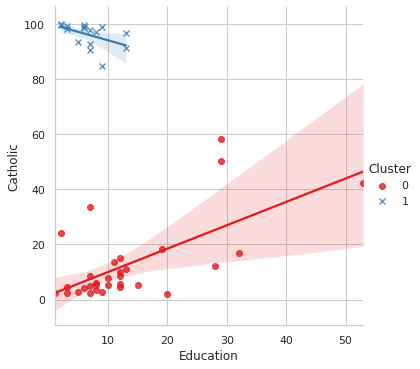

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Для прорисовки графики
%matplotlib inline

clustering = AgglomerativeClustering().fit(data)

data['Cluster'] = clustering.labels_
#plt.scatter(data['Education'], data['Catholic'], c=clustering.labels_, cmap='rainbow')

#plt.figure(figsize=(740, 10))


f = plt.figure(figsize=(10, 10))
gs = f.add_gridspec(2, 2)

with sns.axes_style("whitegrid"):
    sns.lmplot(x="Education", y="Catholic", hue="Cluster", data=data, markers=["o", "x"], palette="Set1");

#plt.xlabel("Education")
#plt.ylabel("Catholic")